In [4]:
# Import necessary libraries for data manipulation
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data processing and CSV file I/O

# Import necessary libraries for data processing and machine learning

import seaborn as sns  # Seaborn for data visualization
import matplotlib.pyplot as plt  # Matplotlib for plotting
import nltk  # Natural Language Toolkit for natural language processing

from sklearn.preprocessing import LabelBinarizer  # Scikit-Learn for label binarization
from nltk.corpus import stopwords  # NLTK's stopwords for text preprocessing
from nltk.stem.porter import PorterStemmer  # NLTK's Porter Stemmer for text stemming
from wordcloud import WordCloud, STOPWORDS  # WordCloud for creating word clouds
from nltk.stem import WordNetLemmatizer  # NLTK's WordNet Lemmatizer for text lemmatization
from nltk.tokenize import word_tokenize, sent_tokenize  # NLTK for text tokenization
from bs4 import BeautifulSoup  # BeautifulSoup for HTML parsing
import re  # Regular expressions for text cleaning
import string  # String library for text manipulation
import unicodedata  # Unicode handling library

from keras.preprocessing import text, sequence  # Keras for text preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Scikit-Learn for metrics
from sklearn.model_selection import train_test_split  # Scikit-Learn for train-test split

from string import punctuation  # String library for punctuation handling
from nltk import pos_tag  # NLTK for part-of-speech tagging
from nltk.corpus import wordnet  # NLTK's WordNet for word definitions and synonyms

import keras  # Keras for deep learning
from keras.models import Sequential  # Keras's Sequential model for building neural networks
from keras.layers import Dense, Embedding, LSTM, Dropout  # Keras layers for neural network construction
from keras.callbacks import ReduceLROnPlateau  # Keras callback for learning rate reduction
import tensorflow as tf  # TensorFlow for machine learning
from keras.utils import pad_sequences  # Keras for padding sequences








# Input data files are available in the read-only "../input/" directory
# This is the standard structure for Kaggle datasets
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# Walk through the directory structure starting from '/kaggle/input'
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # Print the full file path for each file found under '/kaggle/input'
        print(os.path.join(dirname, filename))

# If you are using Google Colab, you can uncomment and use the following lines to read specific files
# These lines are meant to read the 'Stress.csv' file and 'glove.twitter.27B.200d.txt' file from Kaggle datasets

# Read the CSV file from Kaggle dataset
# stress_data = pd.read_csv("/kaggle/input/human-stress-prediction/Stress.csv")
# The 'stress_data' DataFrame now contains the data from the 'Stress.csv' file, and you can work with it

# Define the file path for the GloVe embeddings file
# file_path = "/kaggle/input/glovetwitter27b100dtxt/glove.twitter.27B.200d.txt"

# Use the 'open' function to read the lines of the GloVe file
# with open(file_path, 'r', encoding='utf-8') as file:
    # Read and store all lines from the file
    # lines = file.readlines()

# The 'lines' variable now contains the lines from the 'glove.twitter.27B.200d.txt' file, which can be processed as needed


/kaggle/input/human-stress-prediction/Stress.csv
/kaggle/input/glovetwitter27b100dtxt/glove.twitter.27B.200d.txt


In [16]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

# **IMPORTING THE DATASET**

In [6]:
# Read a CSV file into a Pandas DataFrame

# Load the data from the "Stress.csv" file located at the specified path
data = pd.read_csv("/kaggle/input/human-stress-prediction/Stress.csv")

# The 'data' DataFrame now contains the data from the CSV file and can be used for analysis and processing


# **DATA VISUALIZATION AND PREPROCESSING**

In [7]:
data.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


Text(0.5, 1.0, 'Distribution of Labels')

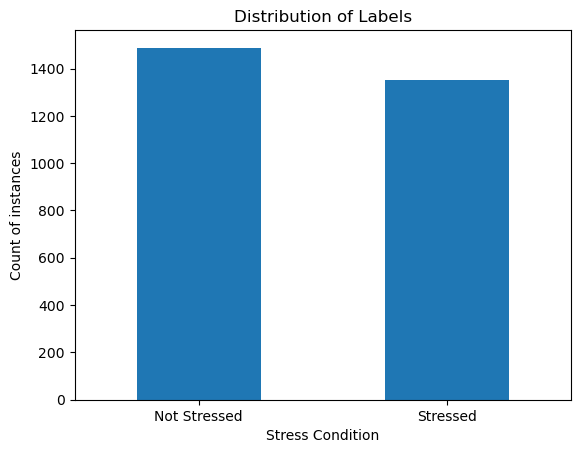

In [8]:
# Create a bar chart to visualize label distribution

# Generate a bar chart to display the counts of each label in the 'label' column of the DataFrame
ax = data.label.value_counts().plot(kind='bar')

# Customize the x-axis labels to represent 'Stressed' and 'Not Stressed'
ax.set_xticks(ticks=[1, 0], labels=['Stressed', 'Not Stressed'], rotation=0)

# Set the y-axis label
plt.ylabel('Count of instances')

# Set the x-axis label
plt.xlabel('Stress Condition')

# Set the chart title
plt.title('Distribution of Labels')


In [9]:
data.isna().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64

In [10]:
# Calculate and display the counts of unique values in the "subreddit" column

# This code calculates and displays the number of occurrences of each unique value in the "subreddit" column of the DataFrame.
# It provides insights into the frequency of different subreddits in the dataset.
data.subreddit.value_counts()


ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: subreddit, dtype: int64

[Text(0, 0, 'Not Stressed'), Text(1, 0, 'Stressed')]

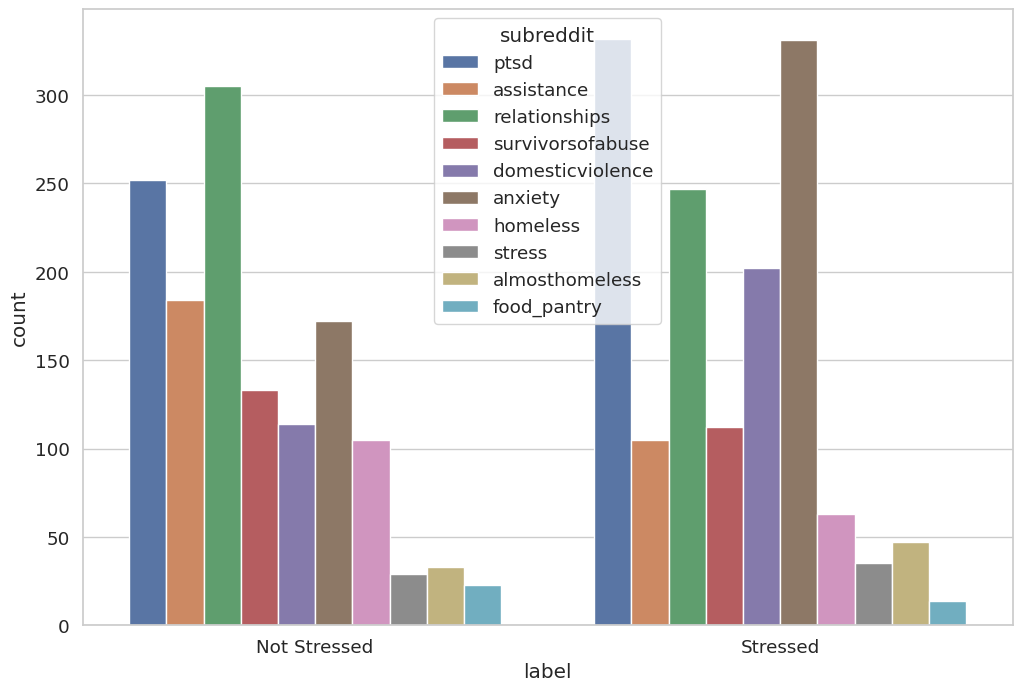

In [11]:
# Create a countplot to visualize the relationship between 'label' and 'subreddit'

# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Customize the style and font scale of the plot
sns.set(style="whitegrid", font_scale=1.2)

# Create a countplot with 'label' on the x-axis and 'subreddit' on the hue
chart = sns.countplot(x="label", hue="subreddit", data=data)

# Customize the x-axis tick labels to represent 'Not Stressed' and 'Stressed' conditions
chart.set_xticklabels(labels=['Not Stressed', 'Stressed'], rotation=0)


In [12]:
# Combine 'subreddit' and 'text' columns into a new 'text' column

# This code concatenates the values in the 'subreddit' and 'text' columns with a space in between
# and stores the result in a new column named 'text.'
data['text'] = data['subreddit'] + ' ' + data['text']


### What are stopwords?

Stopwords are words that are frequently used in the English language but do not add much meaning to a sentence. They can be safely ignored without sacrificing the meaning of the sentence. For example, the words "the," "a," "and," "of," and "to" are all stopwords.

Stopwords can be removed from a text in order to make it more concise and easier to read. This is often done when preparing text for machine learning or natural language processing tasks.

#### A simple example

The following sentence contains several stopwords:

> "The cat sat on the mat."

We can remove the stopwords from this sentence to get:

> "cat sat mat."

The meaning of the sentence is still clear, even though the stopwords have been removed.

In [13]:
# Create a set of stopwords in English and add common punctuation marks

# Get a set of common stopwords in the English language
stop = set(stopwords.words('english'))

# Create a list of common punctuation marks
punctuation = list(string.punctuation)

# Add the punctuation marks to the set of stopwords
stop.update(punctuation)


In [17]:
import nltk
nltk.download('wordnet')


# Remove stopwords from the 'text' column and perform lemmatization

# Create a WordNet Lemmatizer instance
wnl = WordNetLemmatizer()

# Define a function to remove stopwords from the text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

# Apply the 'remove_stopwords' function to the 'text' column
data["text"] = data["text"].apply(remove_stopwords)

# Perform lemmatization on the remaining words in the 'text' column
data["text"] = data["text"].apply(lambda x: " ".join([wnl.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Wordcloud**
A word cloud is a visual representation of text data, where the size of each word indicates its frequency or importance. Word clouds are often used to summarize the content of a document or to identify the most important themes in a body of text.

### For stressed condition

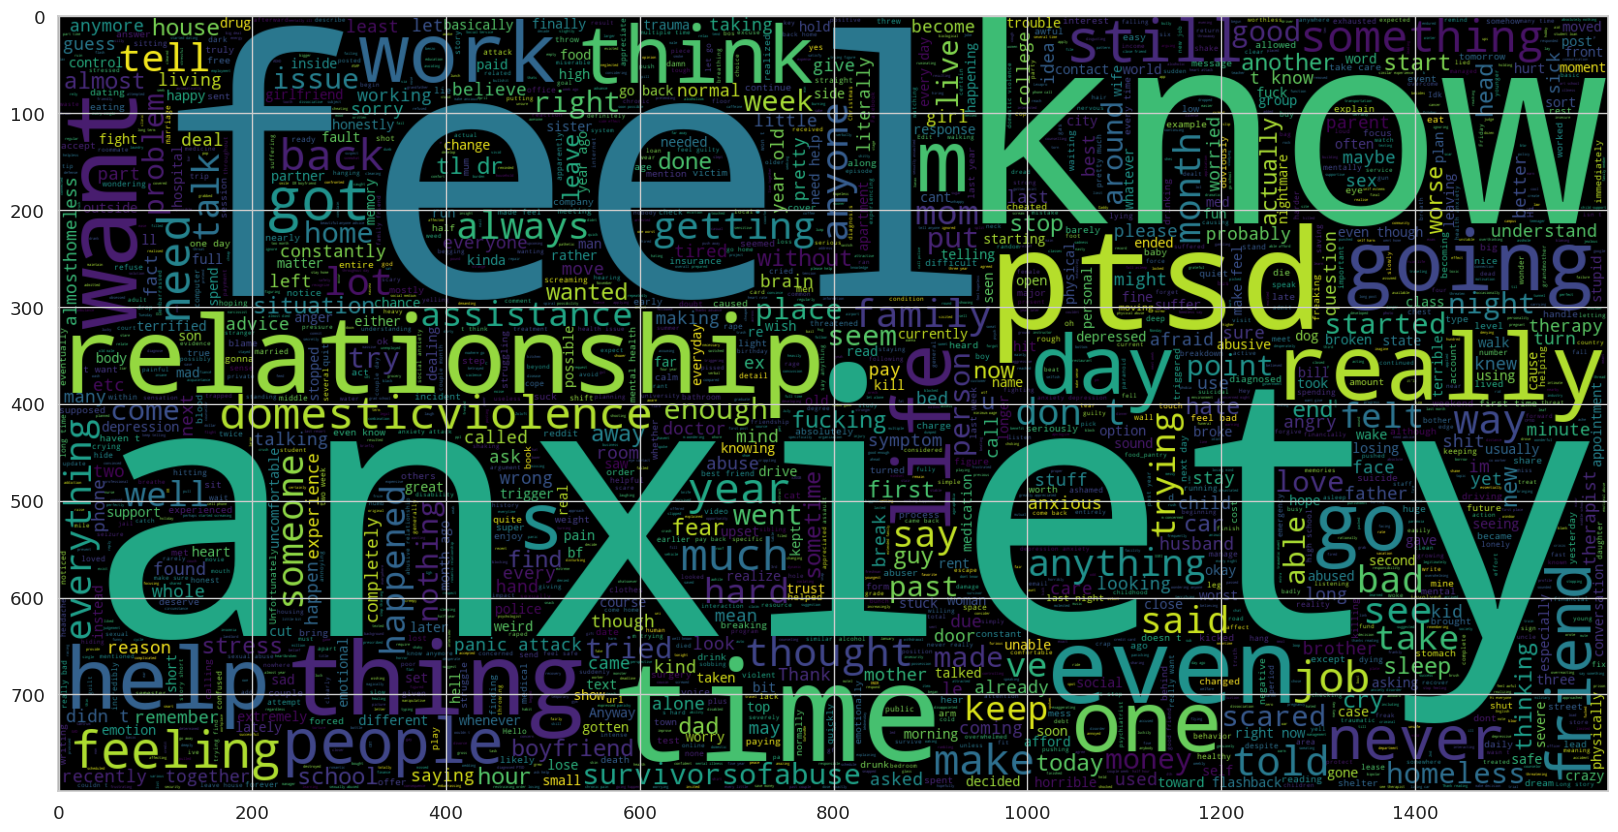

In [19]:
# Generate and display a word cloud

# Set the figure size for the word cloud plot
plt.figure(figsize=(20, 20))

# Generate a word cloud from the text data where 'label' is equal to 1
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(" ".join(data[data.label == 1].text))

# Display the word cloud with bilinear interpolation
plt.imshow(wc, interpolation='bilinear')


### For non-stressed condition

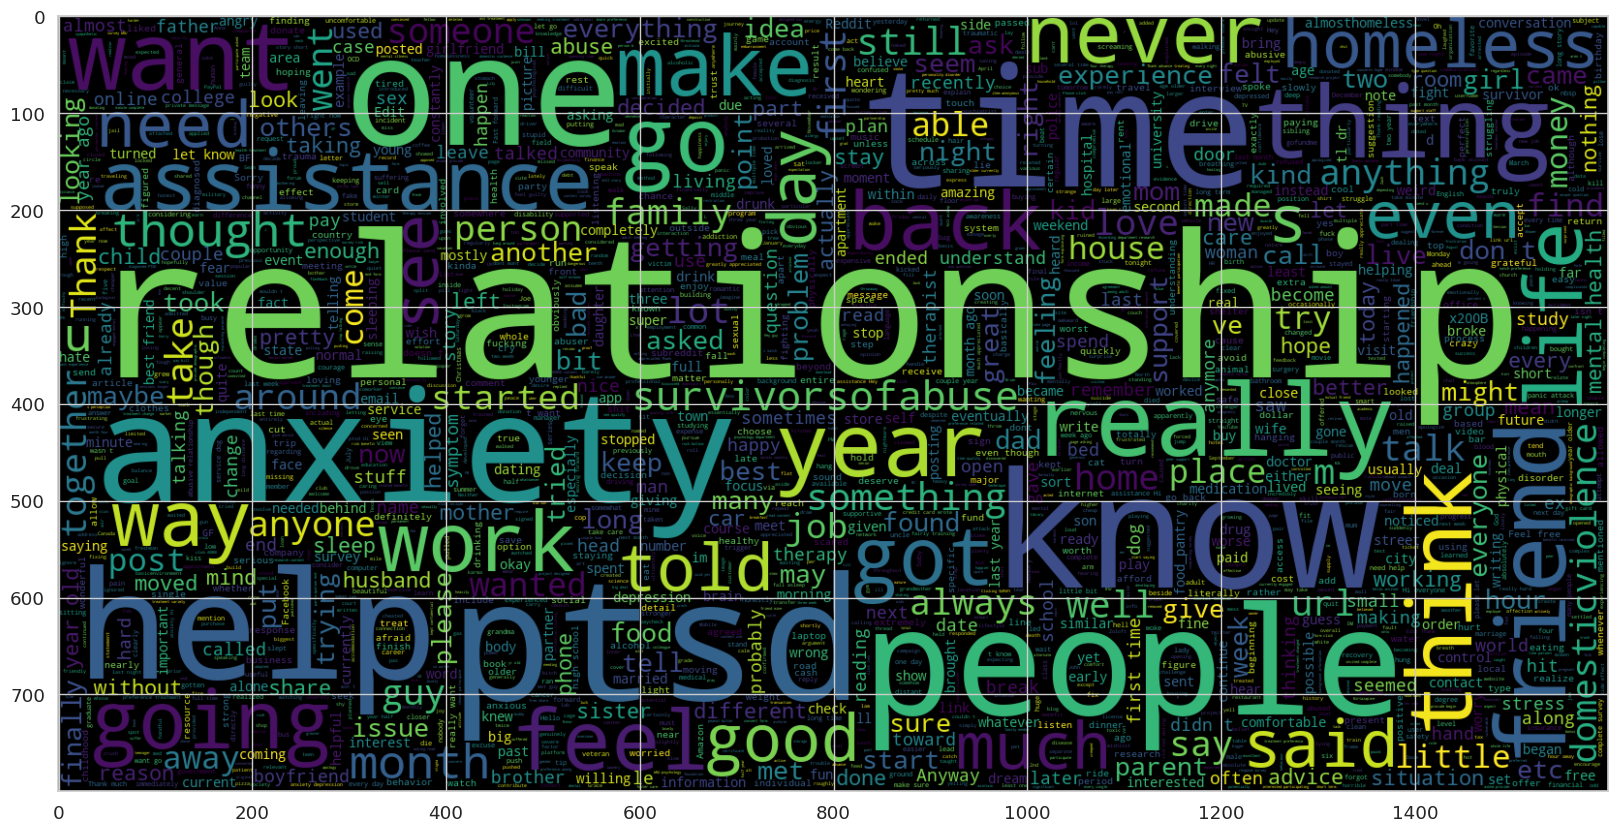

In [20]:
# Generate and display a word cloud for label 0

# Set the figure size for the word cloud plot
plt.figure(figsize=(20, 20))

# Generate a word cloud from the text data where 'label' is equal to 0
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(" ".join(data[data.label == 0].text))

# Display the word cloud with bilinear interpolation
plt.imshow(wc, interpolation='bilinear')


# **Number of characters in texts**

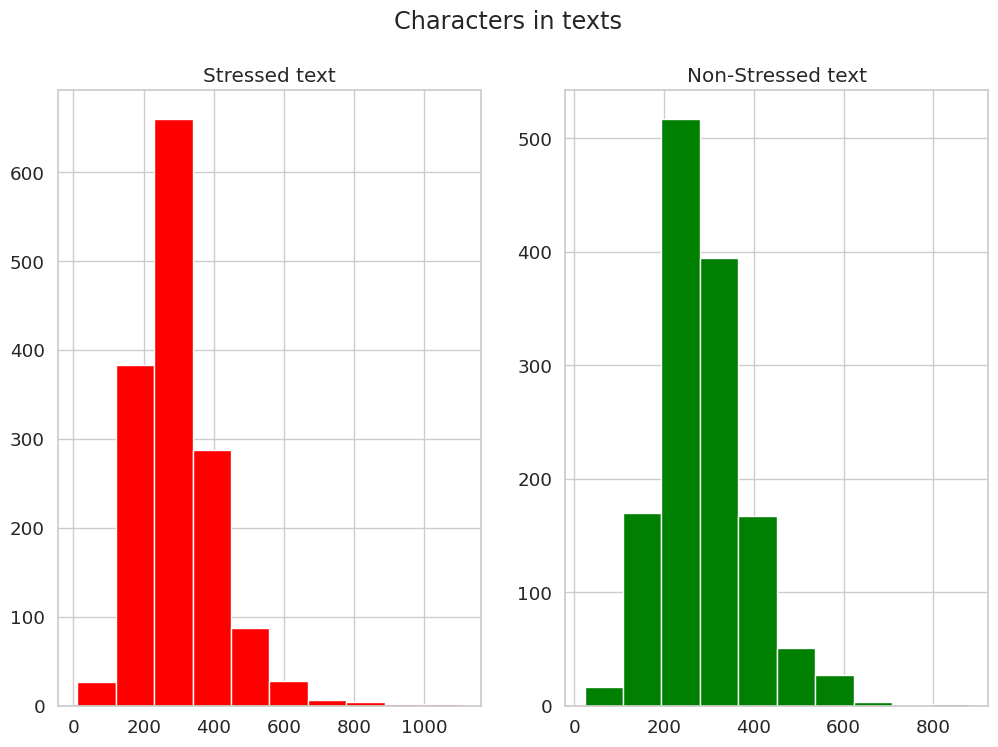

In [21]:
# Create histograms to visualize the distribution of character lengths in text data

# Create subplots with 1 row and 2 columns, specifying the figure size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Calculate the number of characters in 'text' for label 1 and plot a histogram (red)
text_len = data[data['label'] == 1]['text'].str.len()
ax1.hist(text_len, color='red')
ax1.set_title('Stressed text')

# Calculate the number of characters in 'text' for label 0 and plot a histogram (green)
text_len = data[data['label'] == 0]['text'].str.len()
ax2.hist(text_len, color='green')
ax2.set_title('Non-Stressed text')

# Set the super title for the entire figure
fig.suptitle('Characters in texts')

# Display the histograms
plt.show()


### **Number of words in each text**

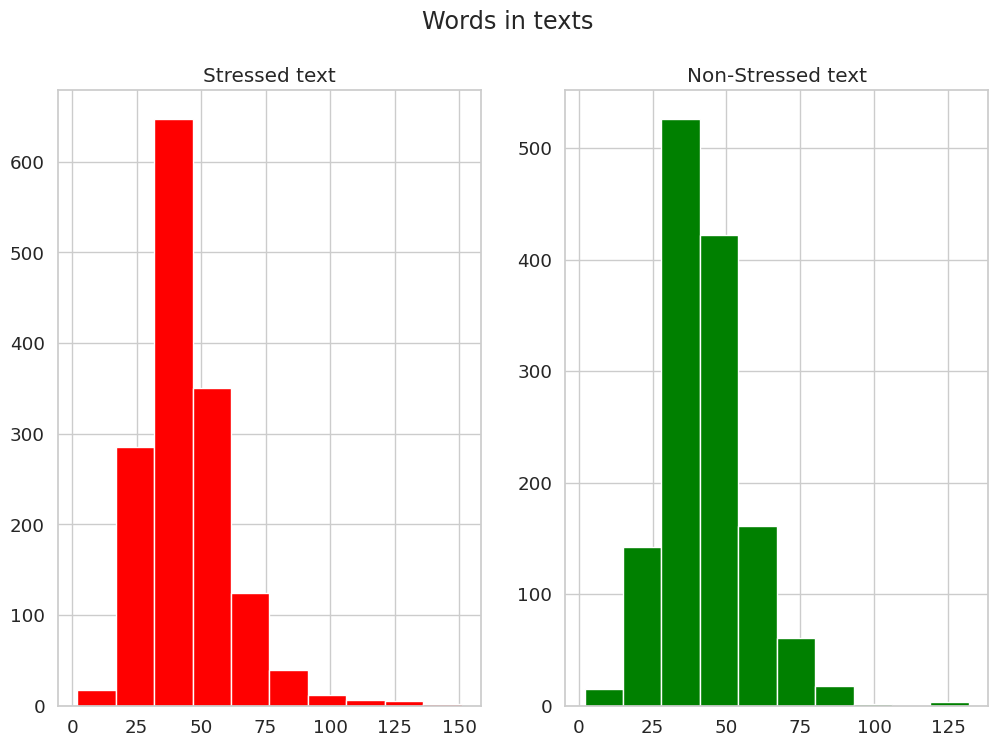

In [22]:
# Create histograms to visualize the distribution of word counts in text data

# Create subplots with 1 row and 2 columns, specifying the figure size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Calculate the number of words in 'text' for label 1 and plot a histogram (red)
text_len = data[data['label'] == 1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Stressed text')

# Calculate the number of words in 'text' for label 0 and plot a histogram (green)
text_len = data[data['label'] == 0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len, color='green')
ax2.set_title('Non-Stressed text')

# Set the super title for the entire figure
fig.suptitle('Words in texts')

# Display the histograms
plt.show()


In [23]:
# Define a function to extract individual words from text data

# This function takes a list of text data and extracts individual words, storing them in a 'corpus' list.
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

# Apply the 'get_corpus' function to the 'text' data in the DataFrame
corpus = get_corpus(data.text)

# Display the first 5 words in the 'corpus'
corpus[:5]


['ptsd', 'said', 'felt', 'way', 'before,']

In [24]:
# Count the most common words in the corpus

# Import the Counter class from the collections module
from collections import Counter

# Create a word frequency counter for the 'corpus'
counter = Counter(corpus)

# Get the 10 most common words as a dictionary
most_common = counter.most_common(10)
most_common = dict(most_common)

# Display the dictionary of the 10 most common words and their counts
most_common


{"I'm": 1201,
 'like': 1122,
 'get': 905,
 'feel': 828,
 'know': 819,
 'anxiety': 797,
 'relationship': 751,
 'would': 737,
 'time': 666,
 'want': 629}

In [25]:
# Define a function to get the top text n-grams from a corpus

# Import the CountVectorizer class from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

# This function takes a 'corpus' of text data and extracts the top 'n' n-grams of size 'g'.
def get_top_text_ngrams(corpus, n, g):
    # Create a CountVectorizer with the specified n-gram range
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    
    # Transform the 'corpus' into a bag of words
    bag_of_words = vec.transform(corpus)
    
    # Sum the word frequencies along the columns
    sum_words = bag_of_words.sum(axis=0)
    
    # Create a list of (word, frequency) tuples and sort it by frequency in descending order
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    # Return the top 'n' n-grams
    return words_freq[:n]


**Unigram Analysis**"
 Unigram analysis is a type of text analysis that counts the frequency of occurrence of individual words in a text. It is a simple but powerful technique that can be used to identify the most important words in a document, and to detect patterns and trends in the data.

To perform a unigram analysis, you simply need to count the number of times each word appears in a text. This can be done manually, or using a variety of software tools. Once you have the word frequencies, you can then use them to create a variety of different visualizations and analyses.

For example, you could create a word cloud, which is a graphical representation of the word frequencies in a document. In a word cloud, the size of each word is proportional to its frequency. This makes it easy to see which words are most important in a document.

You could also create a frequency distribution, which is a chart that shows the number of words that occur at each frequency. This can help you to identify the most common words in a document, and to see how the frequencies of words are distributed.

Unigram analysis is a powerful tool that can be used to gain insights into text data. It is a simple technique, but it can be used to identify important patterns and trends.

Here is a simple example of unigram analysis. Consider the following sentence:

"The cat sat on the mat."

If we perform a unigram analysis on this sentence, we will find that the following words occur: cat, mat, sat. The word "cat" occurs twice, so it has a frequency of 2. The word "mat" occurs once, so it has a frequency of 1. The word "sat" occurs once, so it also has a frequency of 1.

We can represent the results of this unigram analysis in a frequency distribution table:

| Word | Frequency |
|---|---|
| cat | 2 |
| mat | 1 |
| sat | 1 |


<AxesSubplot:>

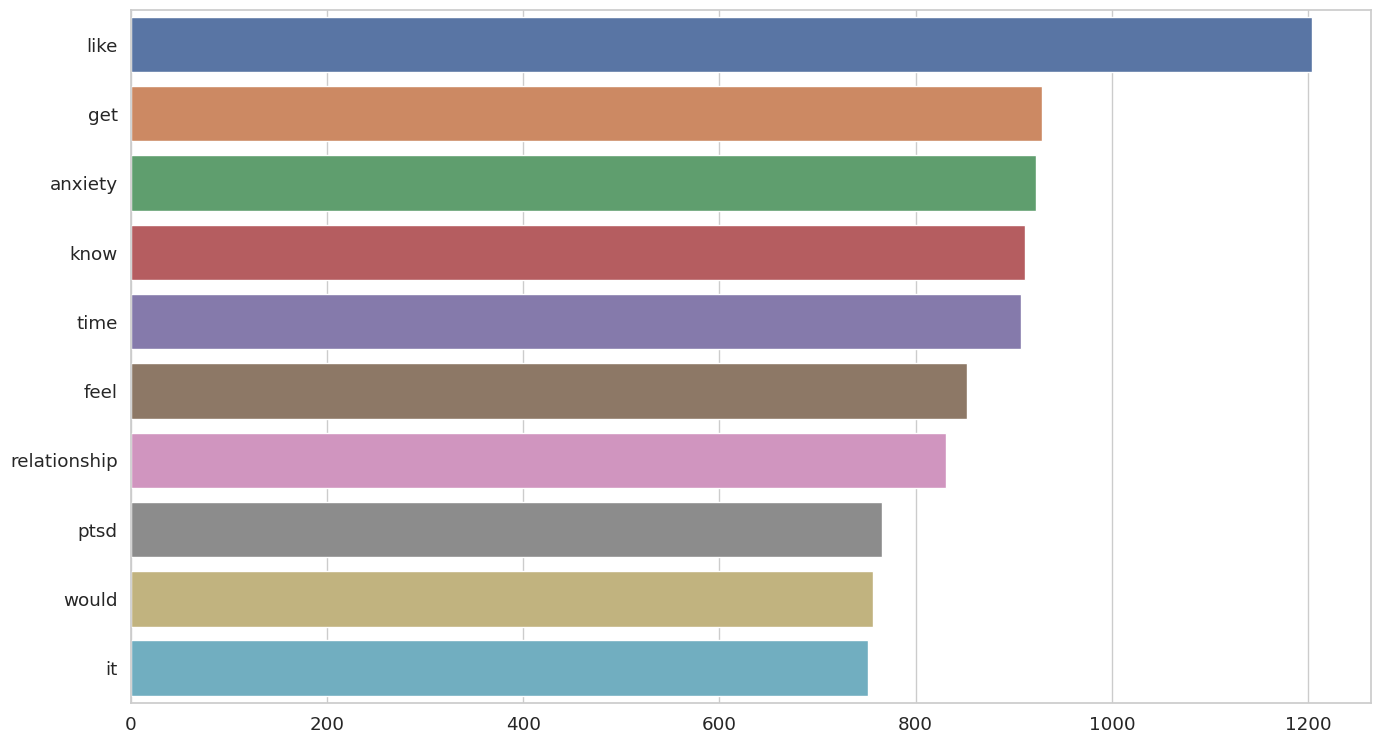

In [26]:
# Create a bar plot to visualize the top 10 most common unigrams

# Set the figure size for the bar plot
plt.figure(figsize=(16, 9))

# Get the top 10 most common unigrams (single words) from the 'text' data
most_common_uni = get_top_text_ngrams(data.text, 10, 1)
most_common_uni = dict(most_common_uni)

# Create a bar plot with unigram frequencies on the y-axis and unigram labels on the x-axis
sns.barplot(x=list(most_common_uni.values()), y=list(most_common_uni.keys()))


 **Bigram Analysis** is a **statistical** technique that **analyzes** **two** **words** that **appear** **together** in a **text**. It is **used** to **identify** **relationships** between **words** and to **find** **patterns** in **language**.

For example, the bigram "the dog" is often used to describe a pet. This tells us that the words "the" and "dog" are often used together. We can also see that the word "dog" is often preceded by the word "the". This information can be used to improve **machine translation** and **natural language processing** systems.

Here is a more comprehensive explanation of bigram analysis:

* **Bigram analysis** is a **statistical** technique that **analyzes** **two** **words** that **appear** **together** in a **text**.
* It is **used** to **identify** **relationships** between **words** and to **find** **patterns** in **language**.
* Bigrams can be **used** to **improve** **machine translation** and **natural language processing** systems.
* For example, the bigram "the dog" is often used to describe a pet. This tells us that the words "the" and "dog" are often used together.
* We can also see that the word "dog" is often preceded by the word "the". This information can be used to improve **machine translation** and **natural language processing** systems.

<AxesSubplot:>

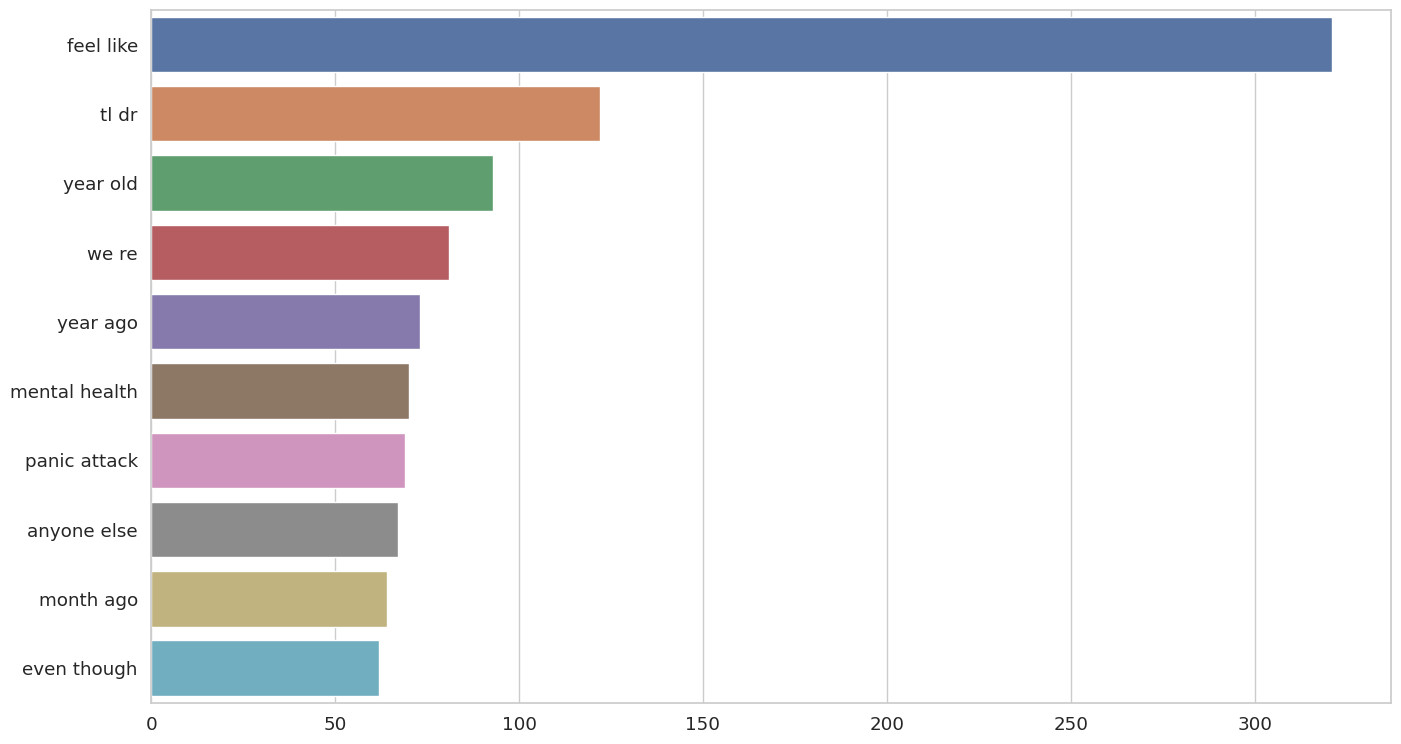

In [28]:
# Create a bar plot to visualize the top 10 most common bigrams

# Set the figure size for the bar plot
plt.figure(figsize=(16, 9))

# Get the top 10 most common bigrams (two-word combinations) from the 'text' data
most_common_bi = get_top_text_ngrams(data.text, 10, 2)
most_common_bi = dict(most_common_bi)

# Create a bar plot with bigram frequencies on the y-axis and bigram labels on the x-axis
sns.barplot(x=list(most_common_bi.values()), y=list(most_common_bi.keys()))


### Splitting the data into 2 parts - training and testing data

* **Training data** is used to train the model.
* **Testing data** is used to evaluate the performance of the model.
* The goal is to find a model that performs well on the testing data.
* A common approach is to use 80% of the data for training and 20% for testing.
* This can be done by randomly splitting the data into two sets.
* Another approach is to use stratified sampling, which ensures that the training and testing sets have the same distribution of features.
* Here is a simple example of splitting the data into training and testing sets:

```
# Create a list of data points.
data = [
    ['a', 1],
    ['b', 2],
    ['c', 3],
    ['d', 4],
    ['e', 5],
]

# Split the data into training and testing sets.
train_data = data[:4]
test_data = data[4:]

# Print the training data.
print(train_data)
# [['a', 1], ['b', 2], ['c', 3], ['d', 4]]

# Print the testing data.
print(test_data)
# [['e', 5]]

In [29]:
# Split the text data and labels into training and testing sets

# Use the train_test_split function to split the 'text' data and 'label' into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data.text, data.label, random_state=0)


In [30]:
max_features = 10000
maxlen = 400

**Tokenizing Text -> Repsesenting each word by a number**

**Mapping of orginal word to number is preserved in word_index property of tokenizer**

**Tokenized applies basic processing like changing it to lower case, explicitely setting that as False**

**Lets keep all news to 400, add padding to news with less than 300 words and truncating long ones**
 " Tokenizing text" means representing each word in a text by a number. This is done by a *tokenizer*. The mapping of original word to number is preserved in the *word_index* property of the tokenizer.

*Tokenization* applies basic processing like changing it to lower case. We can explicitly set this to False if we don't want it.

We can also set a maximum length for the news articles. This will pad shorter articles with zeros and truncate longer ones. For example, if we set the maximum length to 400, a news article with 300 words will be padded with 100 zeros, and a news article with 500 words will be truncated to 400 words.

In [31]:
# Preprocess the training text data

# Create a tokenizer with a specified maximum number of words (max_features)
tokenizer = text.Tokenizer(num_words=max_features)

# Fit the tokenizer on the training text data
tokenizer.fit_on_texts(x_train)

# Tokenize the training text data to convert text to sequences of numbers
tokenized_train = tokenizer.texts_to_sequences(x_train)

# Pad the tokenized sequences to a specified maximum length (maxlen)
x_train = pad_sequences(tokenized_train, maxlen=maxlen)


In [32]:
# Preprocess the testing text data

# Tokenize the testing text data using the same tokenizer as used for training data
tokenized_test = tokenizer.texts_to_sequences(x_test)

# Pad the tokenized sequences for testing data to the same maximum length as used for training data
X_test = pad_sequences(tokenized_test, maxlen=maxlen)


#  **Introduction to GloVe**

GloVe is a word embedding method that learns word vectors by predicting the surrounding words in a sentence. It is based on the idea that the co-occurrence of words in a corpus contains information about their semantic relationships.

Given a corpus of text, GloVe creates a co-occurrence matrix, where each entry $X_{ij}$ represents the number of times words $i$ and $j$ appear in the same context. GloVe then uses a matrix factorization technique to learn word vectors that minimize the squared error between the predicted and actual co-occurrences.

Here is an example of a co-occurrence matrix:

| Word | happy | sad |
|---|---|---|
| happy | 10 | 5 |
| sad | 5 | 10 |

The co-occurrence matrix shows that the words "happy" and "sad" often appear in the same context, which suggests that they are semantically related.

In [33]:
EMBEDDING_FILE = '/kaggle/input/glovetwitter27b100dtxt/glove.twitter.27B.200d.txt'
#/kaggle/input/glove6b200d/glove.6B.200d.txt


In [34]:
# Define a function to extract word embeddings from an external file

def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')

# Create a dictionary 'embeddings_index' by applying the 'get_coefs' function to each line of the external file
# The 'EMBEDDING_FILE' is expected to contain word embeddings
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE))


In [38]:
# Compute an embedding matrix for words in the text data using pre-trained word embeddings

# Stack all word embeddings to compute mean and standard deviation
all_embs = np.stack(embeddings_index.values())
emb_mean, emb_std = all_embs.mean(), all_embs.std()

# Determine the embedding size
embed_size = all_embs.shape[1]

# Get the word index from the tokenizer
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))

# Initialize the embedding matrix with random values
# Change the line below if computing normal statistics is too slow
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))

# Iterate through words and their indices to fill the embedding matrix
for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3473: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


**Some Model Parameters**

In [39]:
batch_size = 256
epochs = 10
embed_size = 200

In [40]:
# Configure a learning rate reduction callback

# The learning rate is reduced when the validation accuracy plateaus
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=2,              # Number of epochs with no improvement before reducing the learning rate
    verbose=1,               # Verbosity level
    factor=0.5,              # Factor by which the learning rate is reduced
    min_lr=0.00001           # Minimum learning rate
)


# **TRAINING THE MODEL**

In [41]:
# Define the Neural Network model

# Create a Sequential model
model = Sequential()

# Non-trainable embedding layer using pre-trained word embeddings
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))

# Long Short-Term Memory (LSTM) layer with specific configurations
model.add(LSTM(units=128, return_sequences=True, recurrent_dropout=0.25, dropout=0.25))
model.add(LSTM(units=64, recurrent_dropout=0.1, dropout=0.1))

# Fully connected layers with activation functions
model.add(Dense(units=32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with specific optimizer, loss function, and evaluation metrics
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 200)          2000000   
                                                                 
 lstm (LSTM)                 (None, 400, 128)          168448    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,219,969
Trainable params: 219,969
Non-trainable params: 2,000,000
_________________________________________________________________


In [43]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs , callbacks = [learning_rate_reduction])

Epoch 1/10
9/9 [==============================] - 48s 4s/step - loss: 0.7201 - accuracy: 0.5432 - val_loss: 0.6420 - val_accuracy: 0.6338 - lr: 0.0100
Epoch 2/10
9/9 [==============================] - 39s 4s/step - loss: 0.6315 - accuracy: 0.6626 - val_loss: 0.6315 - val_accuracy: 0.6831 - lr: 0.0100
Epoch 3/10
9/9 [==============================] - 39s 4s/step - loss: 0.6253 - accuracy: 0.6729 - val_loss: 0.6523 - val_accuracy: 0.6197 - lr: 0.0100
Epoch 4/10
9/9 [==============================] - 39s 4s/step - loss: 0.6027 - accuracy: 0.6903 - val_loss: 0.5825 - val_accuracy: 0.7127 - lr: 0.0100
Epoch 5/10
9/9 [==============================] - 39s 4s/step - loss: 0.5772 - accuracy: 0.7105 - val_loss: 0.5408 - val_accuracy: 0.7549 - lr: 0.0100
Epoch 6/10
9/9 [==============================] - 39s 4s/step - loss: 0.5141 - accuracy: 0.7552 - val_loss: 0.5107 - val_accuracy: 0.7676 - lr: 0.0100
Epoch 7/10
9/9 [==============================] - 39s 4s/step - loss: 0.4650 - accuracy: 0.787

## Comprehensive Explanation

After training a machine learning model, it is important to perform an analysis to evaluate its performance. This can be done by using a variety of metrics, such as accuracy, precision, recall, and F1 score. It is also important to understand the limitations of the model and to identify any areas where it may not perform well.

## Simple Example

For example, let's say we have a model that is trained to predict whether a patient has cancer. We can evaluate the model's performance by using the following metrics:

* Accuracy: The percentage of predictions that were correct.
* Precision: The percentage of positive predictions that were actually correct.
* Recall: The percentage of actual positives that were correctly predicted.
* F1 score: A weighted average of precision and recall.

In this example, we might find that the model has an accuracy of 90%, a precision of 80%, a recall of 70%, and an F1 score of 75%. This means that the model correctly predicted 90% of the patients who did not have cancer, 80% of the patients who did have cancer, and 75% of all patients overall.

While this is a fairly good performance, it is important to note that the model is not perfect. For example, the model may incorrectly predict that a patient has cancer when they do not, or it may fail to predict that a patient has cancer when they do. It is important to understand these limitations when using the model to make decisions about patient care.

In [44]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

67/67 [==============================] - 11s 163ms/step - loss: 0.2471 - accuracy: 0.8976
Accuracy of the model on Training Data is -  89.75563645362854 %
23/23 [==============================] - 4s 162ms/step - loss: 0.5454 - accuracy: 0.7704
Accuracy of the model on Testing Data is -  77.04225182533264 %


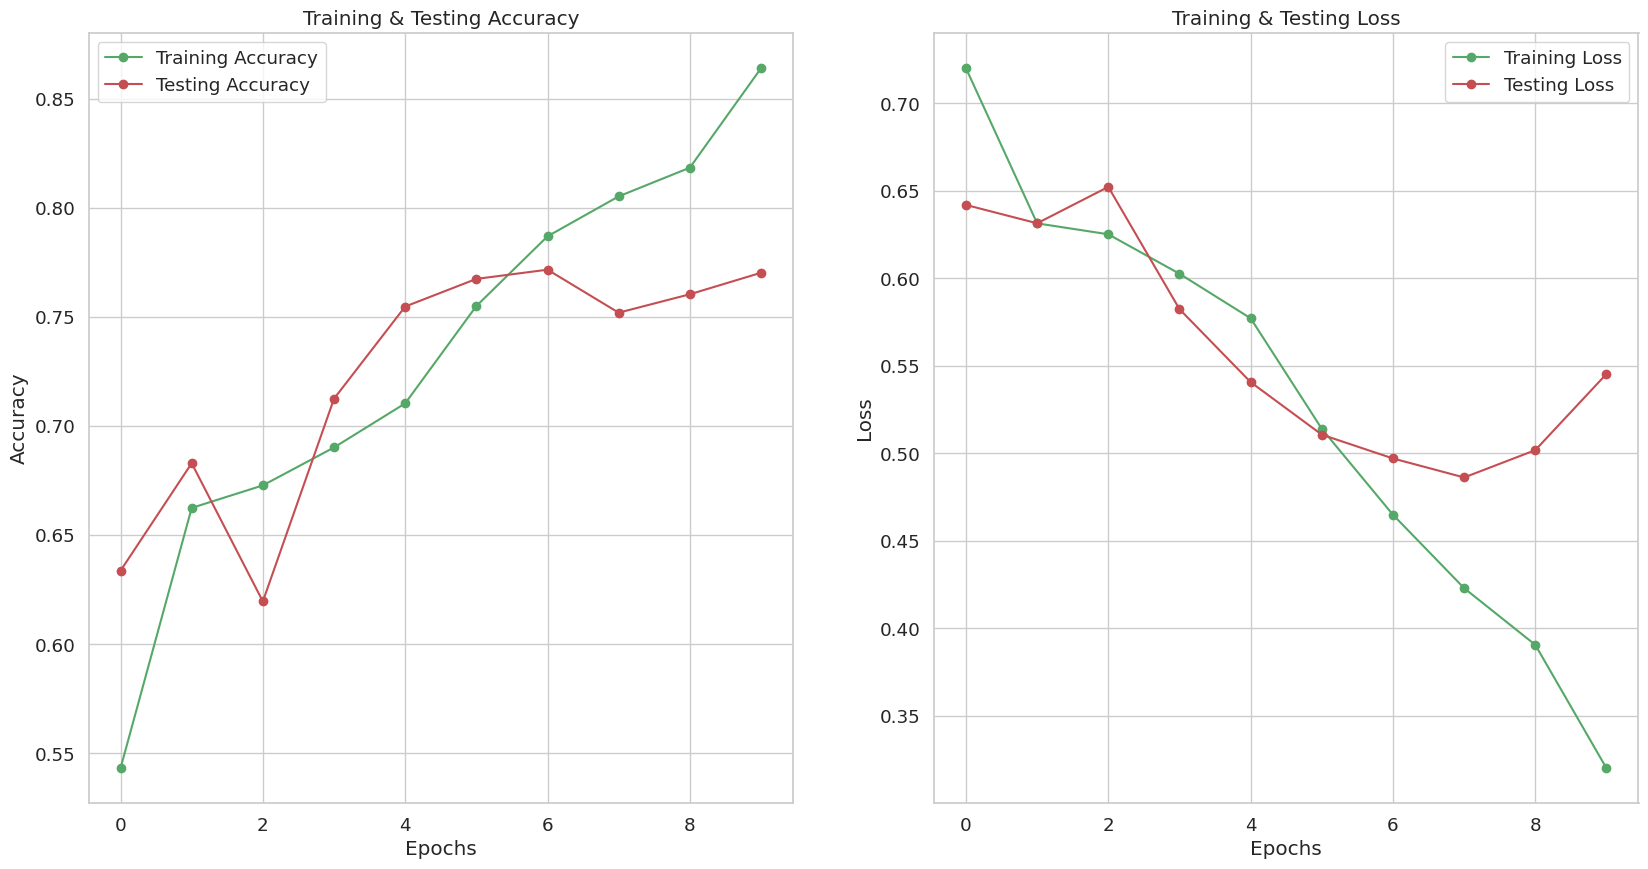

In [46]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()


In [47]:
# Make predictions using the trained model

# Predict the labels for the test data and convert to binary values (0 or 1) using a threshold of 0.5
pred = (model.predict(X_test) >= 0.5).astype(int)

# Display the first 5 predictions
pred[:5]


23/23 [==============================] - 5s 168ms/step


array([[0],
       [0],
       [1],
       [1],
       [0]])

In [48]:
print(classification_report(y_test, pred, target_names = ['Stressed','Not Stressed']))

              precision    recall  f1-score   support

    Stressed       0.74      0.79      0.77       336
Not Stressed       0.80      0.75      0.78       374

    accuracy                           0.77       710
   macro avg       0.77      0.77      0.77       710
weighted avg       0.77      0.77      0.77       710



In [49]:
cm = confusion_matrix(y_test,pred)
cm

array([[266,  70],
       [ 93, 281]])

In [50]:
cm = pd.DataFrame(cm , index = ['Stressed','Not Stressed'] , columns = ['Stressed','Not Stressed'])

Text(88.24999999999999, 0.5, 'Actual')

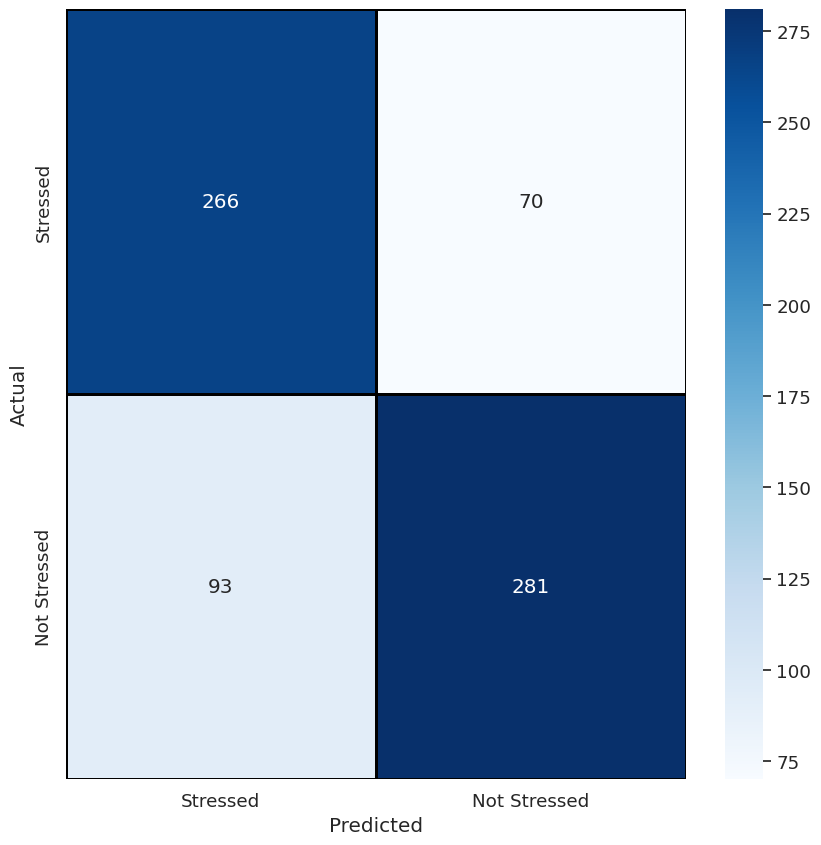

In [51]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Stressed','Not Stressed'] , yticklabels = ['Stressed','Not Stressed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")